In [1]:
import pandas as pd

# Load the dataset (semicolon-separated file)
df = pd.read_csv("bank-full.csv", sep=";")

# Display basic info
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumns:")
print(df.columns.tolist())


Shape of dataset: (45211, 17)

First 5 rows:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  

Columns:
['age', 'job', 'marital', 'education', 'default', 'balan

In [2]:
# Check missing values
print("Missing values per column:\n", df.isnull().sum())

# Check target distribution
print("\nTarget variable distribution:")
print(df['y'].value_counts())

# Basic statistics
print("\nSummary statistics:")
print(df.describe())

# Check unique values of categorical columns
print("\nUnique values per categorical column:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].unique()[:10]}")  # show first 10 unique values


Missing values per column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Target variable distribution:
y
no     39922
yes     5289
Name: count, dtype: int64

Summary statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("bank-full.csv", sep=";")  # dataset uses ; as separator

# Quick look
print(df.head())
print(df.info())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #

In [4]:
# Missing values
print("Missing values per column:\n", df.isnull().sum())

# Target distribution
print("\nTarget variable distribution:")
print(df['y'].value_counts())

# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Missing values per column:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Target variable distribution:
y
no     39922
yes     5289
Name: count, dtype: int64

Summary statistics:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000    

C:\Users\nelis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


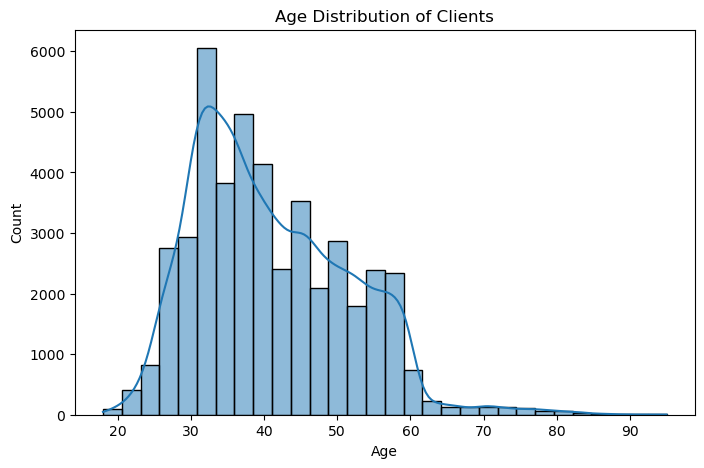

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution of Clients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


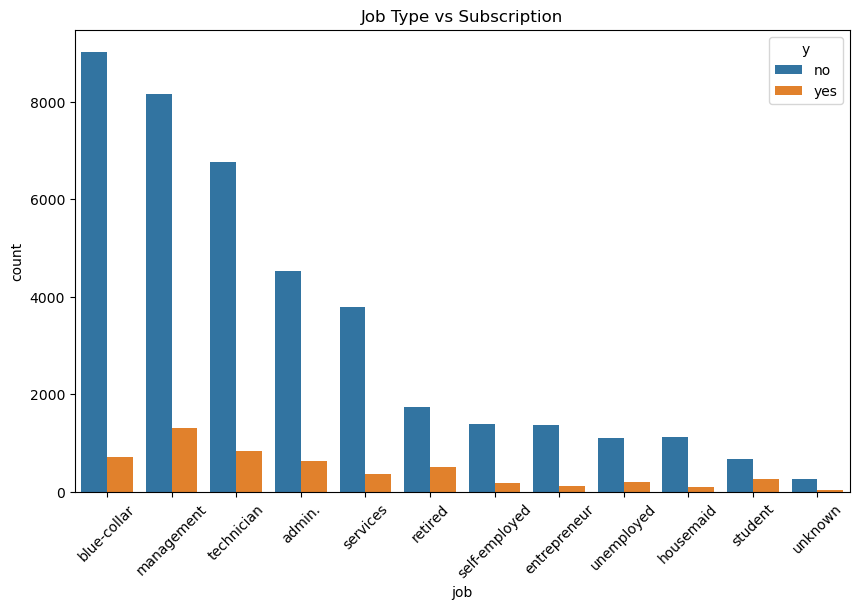

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="job", hue="y", order=df['job'].value_counts().index)
plt.title("Job Type vs Subscription")
plt.xticks(rotation=45)
plt.show()


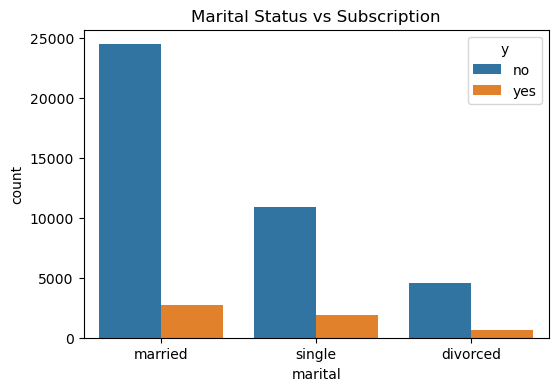

In [7]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="marital", hue="y")
plt.title("Marital Status vs Subscription")
plt.show()


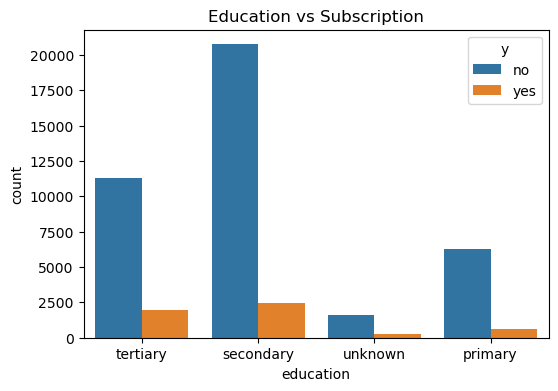

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="education", hue="y")
plt.title("Education vs Subscription")
plt.show()


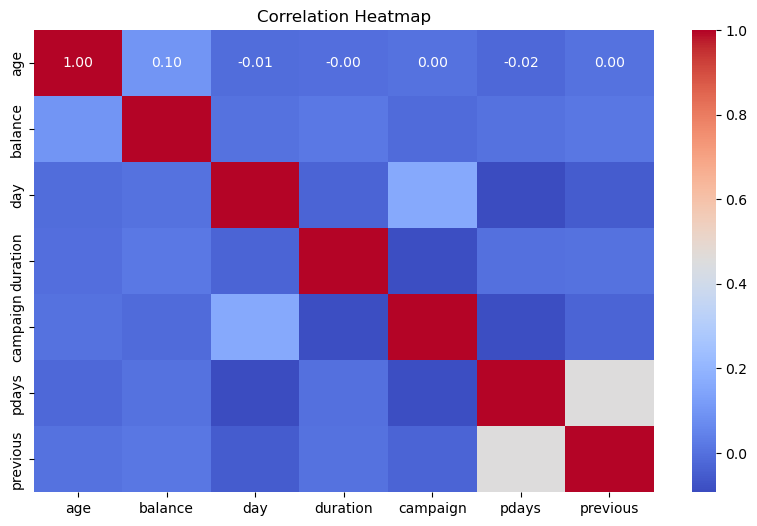

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Make a copy of dataset
data = df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = le.fit_transform(data[col])

# Split features and target
X = data.drop('y', axis=1)
y = data['y']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Shape of training set:", X_train.shape)
print("Shape of test set:", X_test.shape)


Shape of training set: (36168, 16)
Shape of test set: (9043, 16)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[7824  161]
 [ 840  218]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.58      0.21      0.30      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.59      0.62      9043
weighted avg       0.86      0.89      0.87      9043



C:\Users\nelis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Confusion Matrix (RF):\n", confusion_matrix(y_test, rf_pred))
print("\nClassification Report (RF):\n", classification_report(y_test, rf_pred))


Confusion Matrix (RF):
 [[7755  230]
 [ 617  441]]

Classification Report (RF):
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      7985
           1       0.66      0.42      0.51      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.69      0.73      9043
weighted avg       0.89      0.91      0.90      9043



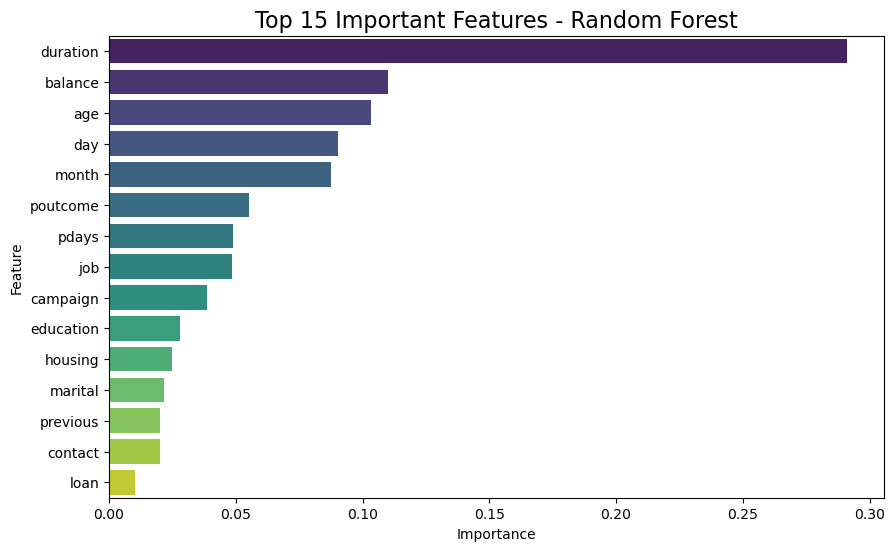

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from Random Forest
importances = rf.feature_importances_
features = X.columns

# Create DataFrame
feat_imp = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')
plt.title("Top 15 Important Features - Random Forest", fontsize=16)
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Random Forest with balanced class weights
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_balanced.fit(X_train, y_train)

# Predictions
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluation
print("Confusion Matrix (RF Balanced):\n", confusion_matrix(y_test, y_pred_balanced))
print("\nClassification Report (RF Balanced):\n", classification_report(y_test, y_pred_balanced))


Confusion Matrix (RF Balanced):
 [[7798  187]
 [ 694  364]]

Classification Report (RF Balanced):
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7985
           1       0.66      0.34      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [15]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Random Forest on SMOTE data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_smote = rf_smote.predict(X_test)

# Evaluation
print("Confusion Matrix (RF SMOTE):\n", confusion_matrix(y_test, y_pred_smote))
print("\nClassification Report (RF SMOTE):\n", classification_report(y_test, y_pred_smote))


Confusion Matrix (RF SMOTE):
 [[7304  681]
 [ 378  680]]

Classification Report (RF SMOTE):
               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7985
           1       0.50      0.64      0.56      1058

    accuracy                           0.88      9043
   macro avg       0.73      0.78      0.75      9043
weighted avg       0.90      0.88      0.89      9043



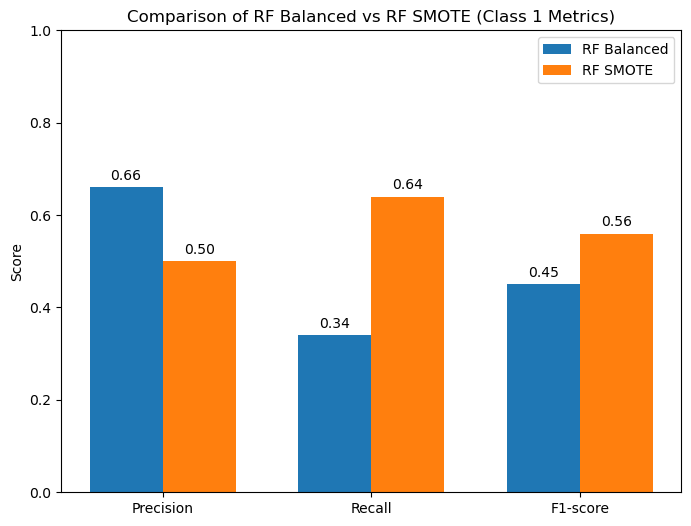

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics manually taken from your results
metrics = ["Precision", "Recall", "F1-score"]

# Class 1 (subscribers) metrics
balanced_scores = [0.66, 0.34, 0.45]   # From RF Balanced
smote_scores = [0.50, 0.64, 0.56]      # From RF SMOTE

x = np.arange(len(metrics))  # bar positions
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, balanced_scores, width, label="RF Balanced")
rects2 = ax.bar(x + width/2, smote_scores, width, label="RF SMOTE")

# Add labels
ax.set_ylabel("Score")
ax.set_title("Comparison of RF Balanced vs RF SMOTE (Class 1 Metrics)")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value labels
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha="center", va="bottom")

plt.ylim(0,1)
plt.show()
